

# Importing Lib



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# **Importing Dataset**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/AQI Anlaysis Week3 Project/city_day.csv')


Mounted at /content/drive


In [3]:
print(f'No.s of Columns: {len(df.columns)}')
print(f'No.s of Rows: {len(df)}')
df.head()

No.s of Columns: 16
No.s of Rows: 29531


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [4]:
# Creating Duplicates dataset
df_1 = df.copy()

# 2. Check the Data Structure

In [5]:
print(df_1.shape)
print(f'No.s of Columns: {len(df_1.columns)}')
print(f'No.s of Rows: {len(df_1)}')

(29531, 16)
No.s of Columns: 16
No.s of Rows: 29531


In [6]:
print(df_1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB
None


In [7]:
df_1.describe(include='all')

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
count,29531,29531,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000,24850
unique,26,2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
top,Ahmedabad,2020-06-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Moderate
freq,2009,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8829
mean,NaN,NaN,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581,NaN
std,NaN,NaN,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585,NaN
min,NaN,NaN,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000,NaN
25%,NaN,NaN,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000,NaN
50%,NaN,NaN,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000,NaN
75%,NaN,NaN,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000,NaN


Unique Values

In [8]:
df_1.nunique()

,0
City,26
Date,2009
PM2.5,11716
PM10,12571
NO,5776
NO2,7404
NOx,8156
NH3,5922
CO,1779
SO2,4761


# Checking Null Values & Plot the visual As per Null Values

In [9]:
print(df_1.isnull().sum())

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64


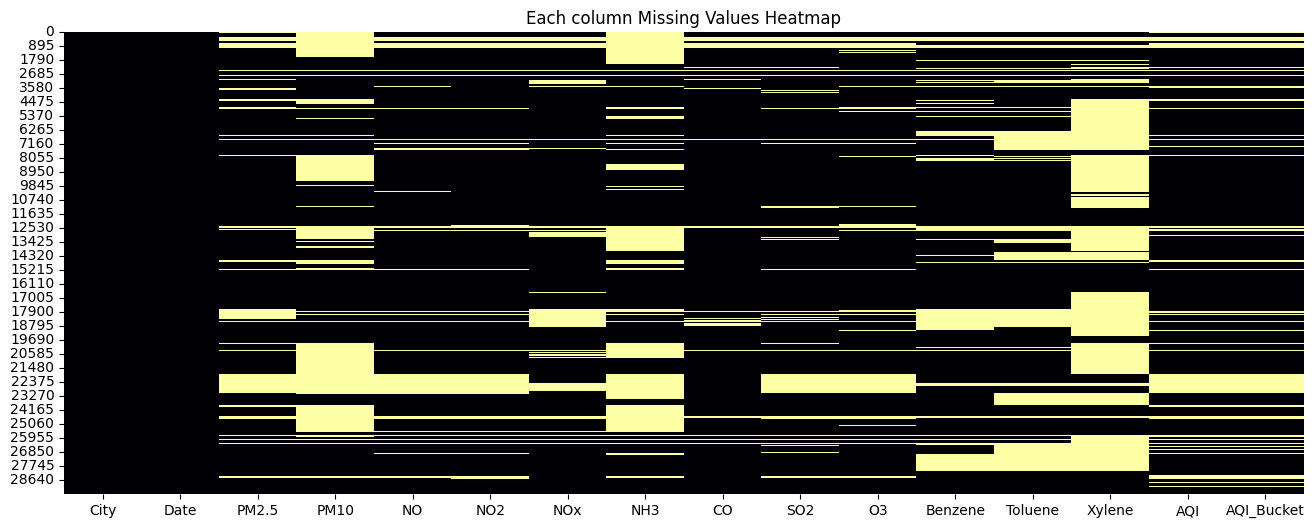

In [10]:
# Missing Value plot

plt.figure(figsize=(16,6))
sns.heatmap(df.isnull(), cmap= 'inferno', cbar=False)
plt.title("Each column Missing Values Heatmap")
plt.show()

In [11]:
# Count missing values and sort
missing = df_1.isnull().sum().sort_values(ascending=False)
missing


,0
Xylene,18109
PM10,11140
NH3,10328
Toluene,8041
Benzene,5623
AQI,4681
AQI_Bucket,4681
PM2.5,4598
NOx,4185
O3,4022


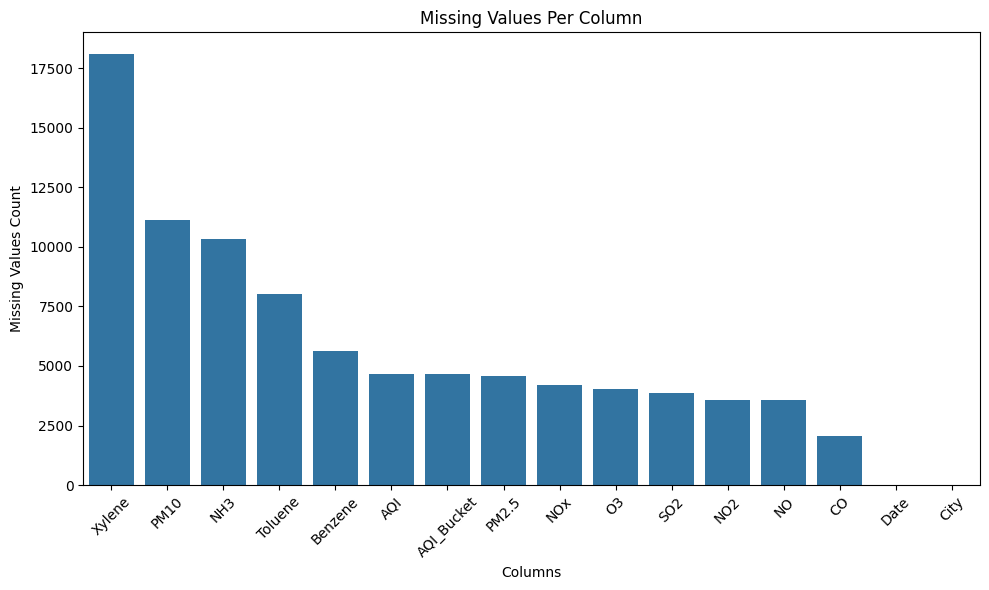

In [12]:
# Bar plot for missing value for each column
plt.figure(figsize=(10,6))


sns.barplot(x=missing.index, y=missing.values)

plt.xticks(rotation=45)
plt.ylabel("Missing Values Count")
plt.xlabel("Columns")
plt.title("Missing Values Per Column")

# Add gap between bars
plt.tight_layout()
plt.show()

# CHECKING & REMOVING DUPLICATES

In [13]:
duplicate_rows = df_1[df_1.duplicated()]
print("Total Duplicates:", duplicate_rows.shape[0])

# no duplicates

Total Duplicates: 0


# Handling Incorrect Data

In [14]:
df_1[df_1[['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2','O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']] < 0].sum()

,0
City,0
Date,0
PM2.5,0.0
PM10,0.0
NO,0.0
NO2,0.0
NOx,0.0
NH3,0.0
CO,0.0
SO2,0.0


no negative values for integer columns

# Modifying column Name into lowercase and removing space

In [15]:
df_1.columns = df_1.columns.str.lower().str.replace(' ', '_')
df_1.head()


,city,date,pm2.5,pm10,no,no2,nox,nh3,co,so2,o3,benzene,toluene,xylene,aqi,aqi_bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


# Data into Correct Format

In [16]:
# Changing date column to date type

df_1['date'] = pd.to_datetime(df_1['date'], errors='coerce')

# Sort by date
df_1= df_1.sort_values(by='date')
df_1

,city,date,pm2.5,pm10,no,no2,nox,nh3,co,so2,o3,benzene,toluene,xylene,aqi,aqi_bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
7834,Chennai,2015-01-01,NaN,NaN,16.30,15.39,22.68,4.59,1.17,9.20,11.35,0.17,NaN,NaN,NaN,NaN
10229,Delhi,2015-01-01,313.22,607.98,69.16,36.39,110.59,33.85,15.20,9.25,41.68,14.36,24.86,9.84,472.0,Severe
19846,Lucknow,2015-01-01,NaN,NaN,2.11,13.46,4.57,NaN,12.15,169.57,25.92,1.35,3.93,NaN,NaN,NaN
21855,Mumbai,2015-01-01,NaN,NaN,NaN,NaN,27.38,NaN,0.00,NaN,NaN,0.00,0.00,0.00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3072,Amaravati,2020-07-01,22.00,34.00,1.50,9.68,6.40,8.45,0.59,10.88,29.15,0.10,0.50,NaN,54.0,Satisfactory
26956,Talcher,2020-07-01,24.85,31.06,27.73,29.36,57.09,1.37,1.52,14.42,14.90,0.00,NaN,NaN,101.0,Moderate
28068,Thiruvananthapuram,2020-07-01,2.00,35.00,1.68,2.30,2.58,5.62,0.42,6.15,22.10,NaN,NaN,NaN,41.0,Good
7833,Chandigarh,2020-07-01,32.90,72.38,0.56,9.87,5.92,36.63,0.33,14.91,34.33,3.31,0.33,0.46,66.0,Satisfactory


# Replacing and Removing Misssing Values

In [17]:
# As this columns as More Null Values So we Drop Columns

df_1 = df_1.drop(columns= ["nh3","xylene","toluene", "benzene"])
df_1

,city,date,pm2.5,pm10,no,no2,nox,co,so2,o3,aqi,aqi_bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,0.92,27.64,133.36,NaN,NaN
7834,Chennai,2015-01-01,NaN,NaN,16.30,15.39,22.68,1.17,9.20,11.35,NaN,NaN
10229,Delhi,2015-01-01,313.22,607.98,69.16,36.39,110.59,15.20,9.25,41.68,472.0,Severe
19846,Lucknow,2015-01-01,NaN,NaN,2.11,13.46,4.57,12.15,169.57,25.92,NaN,NaN
21855,Mumbai,2015-01-01,NaN,NaN,NaN,NaN,27.38,0.00,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3072,Amaravati,2020-07-01,22.00,34.00,1.50,9.68,6.40,0.59,10.88,29.15,54.0,Satisfactory
26956,Talcher,2020-07-01,24.85,31.06,27.73,29.36,57.09,1.52,14.42,14.90,101.0,Moderate
28068,Thiruvananthapuram,2020-07-01,2.00,35.00,1.68,2.30,2.58,0.42,6.15,22.10,41.0,Good
7833,Chandigarh,2020-07-01,32.90,72.38,0.56,9.87,5.92,0.33,14.91,34.33,66.0,Satisfactory


In [18]:
# As This is the main Column of Total Air Quality We remove Rows that are null

df_1 = df_1.dropna(subset= "aqi")
df_1 = df_1[~(df_1['pm2.5'].isna() & df_1['pm10'].isna())]
df_1.head()

,city,date,pm2.5,pm10,no,no2,nox,co,so2,o3,aqi,aqi_bucket
10229,Delhi,2015-01-01,313.22,607.98,69.16,36.39,110.59,15.20,9.25,41.68,472.0,Severe
10230,Delhi,2015-01-02,186.18,269.55,62.09,32.87,88.14,9.54,6.65,29.97,454.0,Severe
10231,Delhi,2015-01-03,87.18,131.90,25.73,30.31,47.95,10.61,2.65,19.71,143.0,Moderate
10232,Delhi,2015-01-04,151.84,241.84,25.01,36.91,48.62,11.54,4.63,25.36,319.0,Very Poor
10233,Delhi,2015-01-05,146.60,219.13,14.01,34.92,38.25,9.20,3.33,23.20,325.0,Very Poor


In [19]:
print(len(df_1))

24790


In [20]:
# After Removing some columns and Aqi Null VAlues We check the Null Values in Another column
df_1.isnull().sum()

,0
city,0
date,0
pm2.5,618
pm10,7026
no,329
no2,334
nox,1801
co,395
so2,549
o3,750


In [21]:
# Removing pm10 Column As it as More Null Values That will Affect Insight
df_1 = df_1.drop(columns='pm10')

In [22]:
# Replacing Median Value for other columns
replace_median= ['pm2.5', 'no', 'no2', 'nox', 'co', 'so2', 'o3']
for col in replace_median:
    df_1[col] = df_1.groupby('city')[col].transform(lambda x: x.fillna(x.median()))


In [23]:
df_1.isnull().sum()

,0
city,0
date,0
pm2.5,0
no,0
no2,0
nox,766
co,0
so2,0
o3,152
aqi,0


In [24]:
df_1 = df_1.dropna(subset= ["nox","o3"])
print(df_1.shape)
df_1.isnull().sum()

(23872, 11)


,0
city,0
date,0
pm2.5,0
no,0
no2,0
nox,0
co,0
so2,0
o3,0
aqi,0


# Checking Outlier

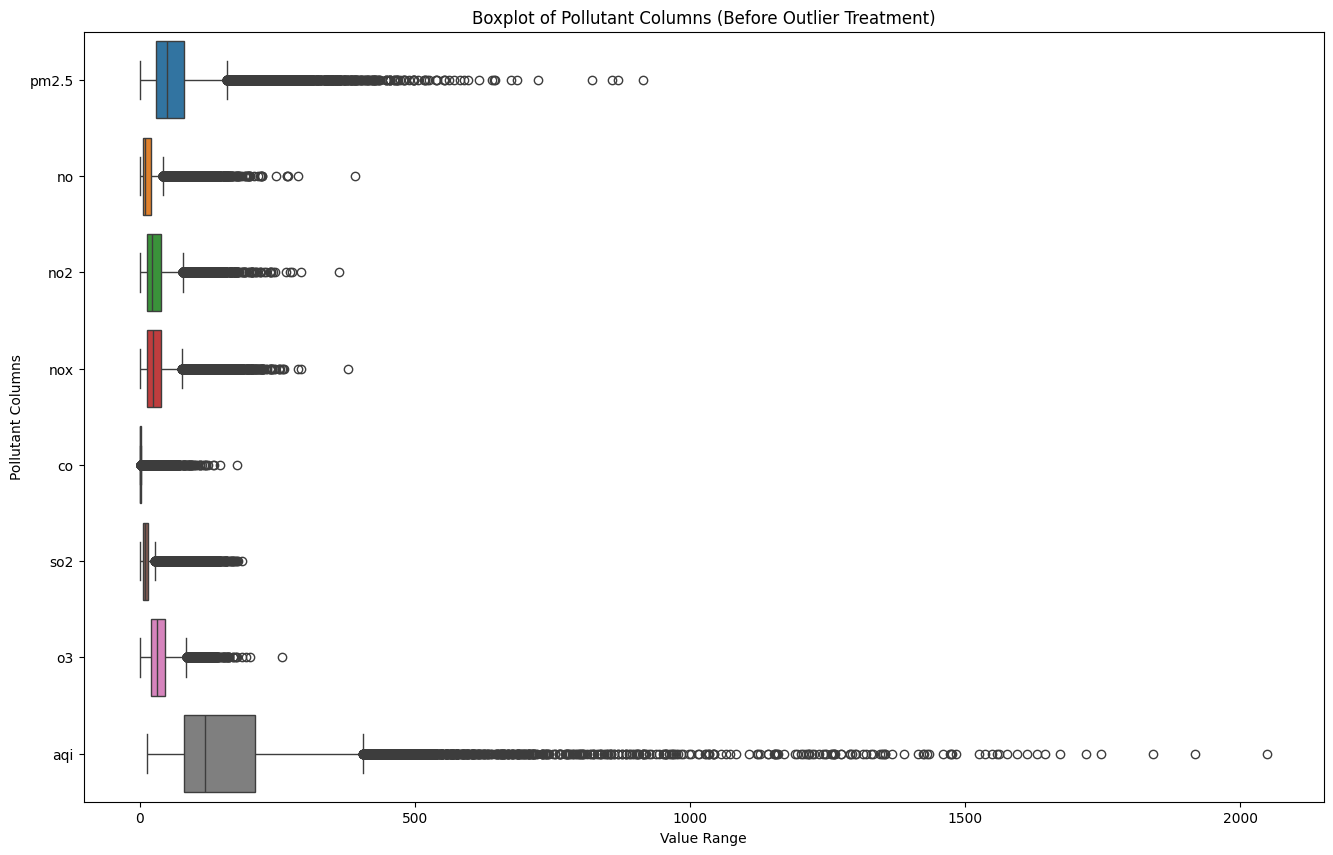

In [25]:
plot_cols = ['pm2.5', 'no', 'no2', 'nox', 'co', 'so2', 'o3', 'aqi']

plt.figure(figsize=(16, 10))

sns.boxplot(data=df_1[plot_cols], orient='h')

plt.title("Boxplot of Pollutant Columns (Before Outlier Treatment)")
plt.xlabel("Value Range")
plt.ylabel("Pollutant Columns")
plt.show()

In [26]:
df_1.describe()

,date,pm2.5,no,no2,nox,co,so2,o3,aqi
count,23872,23872.000000,23872.000000,23872.000000,23872.000000,23872.000000,23872.000000,23872.000000,23872.000000
mean,2018-07-14 05:01:47.372654336,67.552238,17.757732,29.569067,31.998807,2.379709,13.909480,34.841414,167.296079
min,2015-01-01 00:00:00,0.040000,0.030000,0.010000,0.000000,0.000000,0.010000,0.010000,13.000000
25%,2017-07-27 00:00:00,29.230000,5.600000,12.857500,13.780000,0.590000,5.800000,19.530000,80.000000
50%,2018-10-25 00:00:00,48.430000,10.160000,22.810000,23.800000,0.930000,9.140000,31.370000,118.000000
75%,2019-10-03 00:00:00,80.692500,20.220000,38.800000,39.050000,1.470000,14.682500,45.610000,210.000000
max,2020-07-01 00:00:00,914.940000,390.680000,362.210000,378.240000,175.810000,186.080000,257.730000,2049.000000
std,NaN,63.296862,22.519868,24.662870,30.087916,7.152283,16.623602,21.399998,142.534505


# Replacing outlier With Median Value

In [27]:
int_col= ['pm2.5', 'no', 'no2', 'nox', 'co', 'so2', 'o3','aqi']

for col in int_col:
    Q1 = df_1[col].quantile(0.25)
    Q3 = df_1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    med_val = df_1[col].median()
    df_1.loc[df_1[col] < lower_limit, col] = med_val
    df_1.loc[df_1[col] > upper_limit, col] = med_val

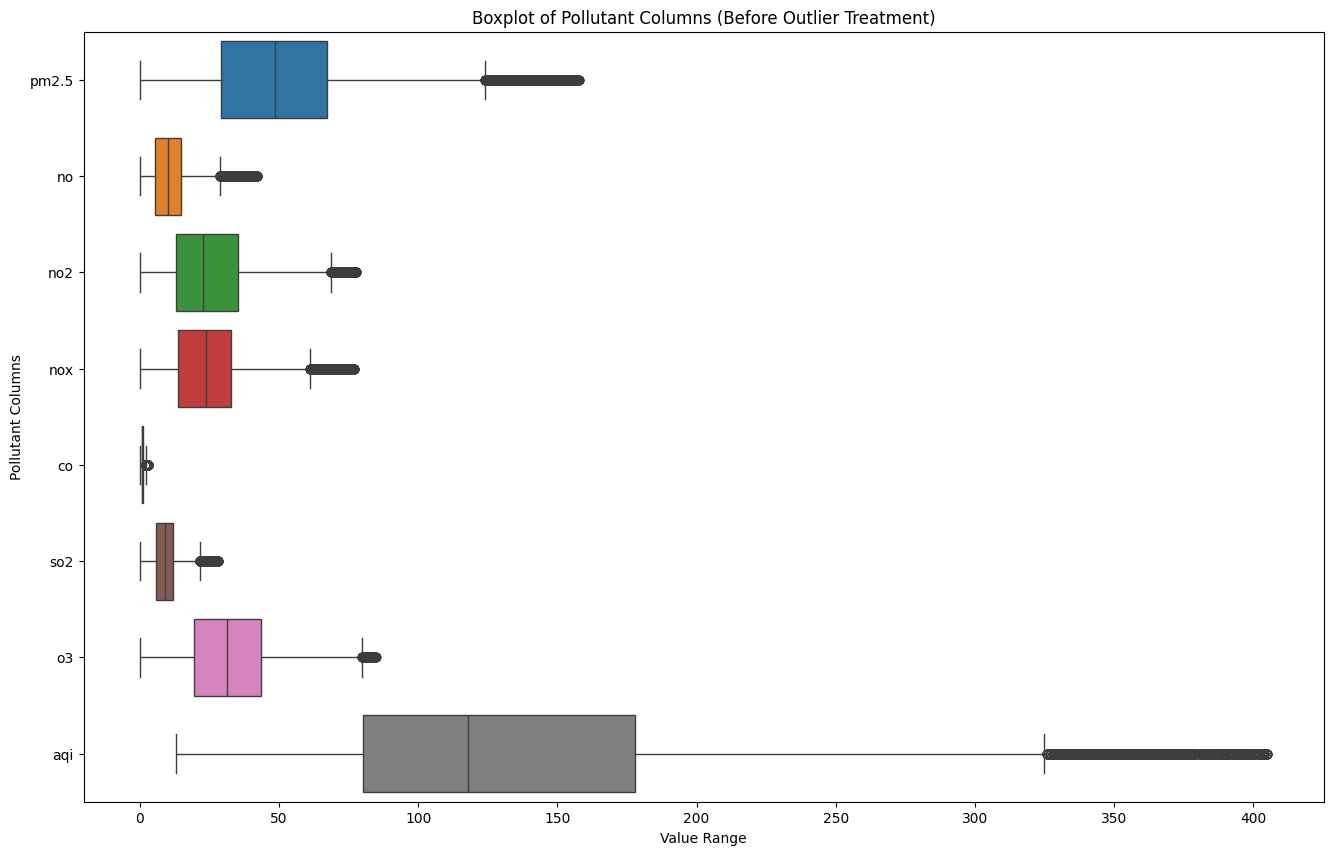

In [28]:
plot_cols = ['pm2.5', 'no', 'no2', 'nox', 'co', 'so2', 'o3','aqi']

plt.figure(figsize=(16, 10))

sns.boxplot(data=df_1[plot_cols], orient='h')

plt.title("Boxplot of Pollutant Columns (Before Outlier Treatment)")
plt.xlabel("Value Range")
plt.ylabel("Pollutant Columns")
plt.show()

In [29]:
df_1.describe()

,date,pm2.5,no,no2,nox,co,so2,o3,aqi
count,23872,23872.000000,23872.000000,23872.00000,23872.000000,23872.000000,23872.000000,23872.000000,23872.000000
mean,2018-07-14 05:01:47.372654336,52.488629,11.696563,25.79843,25.198812,0.952829,9.620763,32.750541,143.246356
min,2015-01-01 00:00:00,0.040000,0.030000,0.01000,0.000000,0.000000,0.010000,0.010000,13.000000
25%,2017-07-27 00:00:00,29.230000,5.600000,12.85750,13.780000,0.590000,5.800000,19.530000,80.000000
50%,2018-10-25 00:00:00,48.430000,10.160000,22.81000,23.800000,0.930000,9.140000,31.370000,118.000000
75%,2019-10-03 00:00:00,67.090000,14.850000,35.13250,32.710000,1.190000,12.060000,43.632500,178.000000
max,2020-07-01 00:00:00,157.850000,42.120000,77.70000,76.950000,2.790000,27.990000,84.680000,405.000000
std,NaN,31.775132,8.759686,16.75179,16.349586,0.546237,5.394144,17.530358,88.600688


In [30]:
# DChanging Aqi Bucket column as we replace Aqi with median values for outlier
def get_aqi_bucket(aqi):
    if aqi <= 50:
        return 'Good'
    elif aqi <= 100:
        return 'Satisfactory'
    elif aqi <= 200:
        return 'Moderate'
    elif aqi <= 300:
        return 'Poor'
    elif aqi <= 400:
        return 'Very Poor'
    else:
        return 'Severe'

# Apply the function to the updated 'aqi' column
df_1['aqi_bucket'] = df_1['aqi'].apply(get_aqi_bucket)

In [31]:
df_1

,city,date,pm2.5,no,no2,nox,co,so2,o3,aqi,aqi_bucket
10229,Delhi,2015-01-01,48.43,10.16,36.39,23.80,0.93,9.25,41.68,118.0,Moderate
10230,Delhi,2015-01-02,48.43,10.16,32.87,23.80,0.93,6.65,29.97,118.0,Moderate
10231,Delhi,2015-01-03,87.18,25.73,30.31,47.95,0.93,2.65,19.71,143.0,Moderate
10232,Delhi,2015-01-04,151.84,25.01,36.91,48.62,0.93,4.63,25.36,319.0,Very Poor
10233,Delhi,2015-01-05,146.60,14.01,34.92,38.25,0.93,3.33,23.20,325.0,Very Poor
...,...,...,...,...,...,...,...,...,...,...,...
3072,Amaravati,2020-07-01,22.00,1.50,9.68,6.40,0.59,10.88,29.15,54.0,Satisfactory
26956,Talcher,2020-07-01,24.85,27.73,29.36,57.09,1.52,14.42,14.90,101.0,Moderate
28068,Thiruvananthapuram,2020-07-01,2.00,1.68,2.30,2.58,0.42,6.15,22.10,41.0,Good
7833,Chandigarh,2020-07-01,32.90,0.56,9.87,5.92,0.33,14.91,34.33,66.0,Satisfactory


# Handle the Categorical Data

In [32]:
# Creating New columns For City in Numerical as Per city
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_1['city_no'] = le.fit_transform(df_1['city'].astype(str))

In [33]:
df_1.groupby(["city_no","city"]).size()

,,0
city_no,city,
0,Ahmedabad,1332
1,Aizawl,111
2,Amaravati,840
3,Amritsar,1119
4,Bengaluru,1909
5,Bhopal,278
6,Brajrajnagar,710
7,Chandigarh,299
8,Chennai,1878


In [34]:
# Creating New column as aqi_bucket_lvl converting aqi_bucket STring column to Number
mapping = {
    "Good": 0,
    "Satisfactory": 1,
    "Moderate": 2,
    "Poor": 3,
    "Very Poor": 4,
    "Severe": 5
}

df_1['aqi_bucket_lvl'] = df_1['aqi_bucket'].map(mapping)

In [35]:
df_1.groupby(["aqi_bucket","aqi_bucket_lvl"]).size()

,,0
aqi_bucket,aqi_bucket_lvl,
Good,0,1322
Moderate,2,9557
Poor,3,2656
Satisfactory,1,7962
Severe,5,73
Very Poor,4,2302


In [36]:
df_1.head(5)

,city,date,pm2.5,no,no2,nox,co,so2,o3,aqi,aqi_bucket,city_no,aqi_bucket_lvl
10229,Delhi,2015-01-01,48.43,10.16,36.39,23.80,0.93,9.25,41.68,118.0,Moderate,10,2
10230,Delhi,2015-01-02,48.43,10.16,32.87,23.80,0.93,6.65,29.97,118.0,Moderate,10,2
10231,Delhi,2015-01-03,87.18,25.73,30.31,47.95,0.93,2.65,19.71,143.0,Moderate,10,2
10232,Delhi,2015-01-04,151.84,25.01,36.91,48.62,0.93,4.63,25.36,319.0,Very Poor,10,4
10233,Delhi,2015-01-05,146.60,14.01,34.92,38.25,0.93,3.33,23.20,325.0,Very Poor,10,4


# Feature Scaling

In [37]:
scale_cols = ["pm2.5", "no", "no2",	"nox", "co", "so2",	"o3"]

scaler = MinMaxScaler()
df_1[scale_cols] = scaler.fit_transform(df_1[scale_cols])

In [38]:
df_1

,city,date,pm2.5,no,no2,nox,co,so2,o3,aqi,aqi_bucket,city_no,aqi_bucket_lvl
10229,Delhi,2015-01-01,0.306635,0.240675,0.468271,0.309292,0.333333,0.330236,0.492146,118.0,Moderate,10,2
10230,Delhi,2015-01-02,0.306635,0.240675,0.422963,0.309292,0.333333,0.237312,0.353844,118.0,Moderate,10,2
10231,Delhi,2015-01-03,0.552183,0.610596,0.390012,0.623132,0.333333,0.094353,0.232668,143.0,Moderate,10,2
10232,Delhi,2015-01-04,0.961916,0.593490,0.474965,0.631839,0.333333,0.165118,0.299398,319.0,Very Poor,10,4
10233,Delhi,2015-01-05,0.928712,0.332145,0.449350,0.497076,0.333333,0.118656,0.273887,325.0,Very Poor,10,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3072,Amaravati,2020-07-01,0.139155,0.034925,0.124469,0.083171,0.211470,0.388492,0.344160,54.0,Satisfactory,2,1
26956,Talcher,2020-07-01,0.157214,0.658114,0.377783,0.741910,0.544803,0.515011,0.175859,101.0,Moderate,21,2
28068,Thiruvananthapuram,2020-07-01,0.012420,0.039202,0.029476,0.033528,0.150538,0.219442,0.260895,41.0,Good,22,0
7833,Chandigarh,2020-07-01,0.208225,0.012592,0.126915,0.076933,0.118280,0.532523,0.405338,66.0,Satisfactory,7,1


# Creating New Column

In [39]:
pollutants = ['pm2.5','no','no2','nox','co','so2','o3']
df_1['pollution_index'] = df_1[pollutants].mean(axis=1)

In [40]:
df_1['year'] = df_1['date'].dt.year
df_1['month'] = df_1['date'].dt.month
df_1['month_name'] = df_1['date'].dt.strftime('%b')
df_1['day'] = df_1['date'].dt.day

In [41]:
df_1['day_of_week'] = df_1['date'].dt.day_name()
df_1['is_weekend'] = df_1['day_of_week'].isin(['Saturday','Sunday'])


In [42]:
df_1 = df_1.sort_values(by=['year', 'month', 'day'])

In [43]:
df_1

,city,date,pm2.5,no,no2,nox,co,so2,o3,aqi,aqi_bucket,city_no,aqi_bucket_lvl,pollution_index,year,month,month_name,day,day_of_week,is_weekend
10229,Delhi,2015-01-01,0.306635,0.240675,0.468271,0.309292,0.333333,0.330236,0.492146,118.0,Moderate,10,2,0.354370,2015,1,Jan,1,Thursday,False
10230,Delhi,2015-01-02,0.306635,0.240675,0.422963,0.309292,0.333333,0.237312,0.353844,118.0,Moderate,10,2,0.314865,2015,1,Jan,2,Friday,False
10231,Delhi,2015-01-03,0.552183,0.610596,0.390012,0.623132,0.333333,0.094353,0.232668,143.0,Moderate,10,2,0.405182,2015,1,Jan,3,Saturday,True
10232,Delhi,2015-01-04,0.961916,0.593490,0.474965,0.631839,0.333333,0.165118,0.299398,319.0,Very Poor,10,4,0.494294,2015,1,Jan,4,Sunday,True
10233,Delhi,2015-01-05,0.928712,0.332145,0.449350,0.497076,0.333333,0.118656,0.273887,325.0,Very Poor,10,4,0.419023,2015,1,Jan,5,Monday,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3072,Amaravati,2020-07-01,0.139155,0.034925,0.124469,0.083171,0.211470,0.388492,0.344160,54.0,Satisfactory,2,1,0.189406,2020,7,Jul,1,Wednesday,False
26956,Talcher,2020-07-01,0.157214,0.658114,0.377783,0.741910,0.544803,0.515011,0.175859,101.0,Moderate,21,2,0.452956,2020,7,Jul,1,Wednesday,False
28068,Thiruvananthapuram,2020-07-01,0.012420,0.039202,0.029476,0.033528,0.150538,0.219442,0.260895,41.0,Good,22,0,0.106500,2020,7,Jul,1,Wednesday,False
7833,Chandigarh,2020-07-01,0.208225,0.012592,0.126915,0.076933,0.118280,0.532523,0.405338,66.0,Satisfactory,7,1,0.211544,2020,7,Jul,1,Wednesday,False


# Final Data Check

In [44]:
df_1.head()

,city,date,pm2.5,no,no2,nox,co,so2,o3,aqi,aqi_bucket,city_no,aqi_bucket_lvl,pollution_index,year,month,month_name,day,day_of_week,is_weekend
10229,Delhi,2015-01-01,0.306635,0.240675,0.468271,0.309292,0.333333,0.330236,0.492146,118.0,Moderate,10,2,0.354370,2015,1,Jan,1,Thursday,False
10230,Delhi,2015-01-02,0.306635,0.240675,0.422963,0.309292,0.333333,0.237312,0.353844,118.0,Moderate,10,2,0.314865,2015,1,Jan,2,Friday,False
10231,Delhi,2015-01-03,0.552183,0.610596,0.390012,0.623132,0.333333,0.094353,0.232668,143.0,Moderate,10,2,0.405182,2015,1,Jan,3,Saturday,True
10232,Delhi,2015-01-04,0.961916,0.593490,0.474965,0.631839,0.333333,0.165118,0.299398,319.0,Very Poor,10,4,0.494294,2015,1,Jan,4,Sunday,True
10233,Delhi,2015-01-05,0.928712,0.332145,0.449350,0.497076,0.333333,0.118656,0.273887,325.0,Very Poor,10,4,0.419023,2015,1,Jan,5,Monday,False


In [45]:
df_1.info()


<class 'pandas.core.frame.DataFrame'>
Index: 23872 entries, 10229 to 29530
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   city             23872 non-null  object        
 1   date             23872 non-null  datetime64[ns]
 2   pm2.5            23872 non-null  float64       
 3   no               23872 non-null  float64       
 4   no2              23872 non-null  float64       
 5   nox              23872 non-null  float64       
 6   co               23872 non-null  float64       
 7   so2              23872 non-null  float64       
 8   o3               23872 non-null  float64       
 9   aqi              23872 non-null  float64       
 10  aqi_bucket       23872 non-null  object        
 11  city_no          23872 non-null  int64         
 12  aqi_bucket_lvl   23872 non-null  int64         
 13  pollution_index  23872 non-null  float64       
 14  year             23872 non-null  int32 

In [46]:
df_1.describe()


,date,pm2.5,no,no2,nox,co,so2,o3,aqi,city_no,aqi_bucket_lvl,pollution_index,year,month,day
count,23872,23872.000000,23872.000000,23872.000000,23872.000000,23872.000000,23872.000000,23872.000000,23872.000000,23872.000000,23872.000000,23872.000000,23872.000000,23872.000000,23872.000000
mean,2018-07-14 05:01:47.372654336,0.332353,0.277181,0.331940,0.327470,0.341516,0.343487,0.386684,143.246356,11.597101,1.869010,0.334376,2018.051483,6.307473,15.779993
min,2015-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000,0.037704,2015.000000,1.000000,1.000000
25%,2017-07-27 00:00:00,0.184969,0.132335,0.165369,0.179077,0.211470,0.206934,0.230542,80.000000,6.000000,1.000000,0.246340,2017.000000,3.000000,8.000000
50%,2018-10-25 00:00:00,0.306635,0.240675,0.293474,0.309292,0.333333,0.326305,0.370379,118.000000,11.000000,2.000000,0.318001,2018.000000,6.000000,16.000000
75%,2019-10-03 00:00:00,0.424878,0.352103,0.452085,0.425081,0.426523,0.430665,0.515206,178.000000,17.000000,2.000000,0.412991,2019.000000,9.000000,23.000000
max,2020-07-01 00:00:00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,405.000000,23.000000,5.000000,0.835173,2020.000000,12.000000,31.000000
std,NaN,0.201351,0.208118,0.215624,0.212470,0.195784,0.192786,0.207043,88.600688,6.691184,1.030745,0.119147,1.488449,3.439728,8.822584


In [47]:
print(df_1.isnull().sum())

city               0
date               0
pm2.5              0
no                 0
no2                0
nox                0
co                 0
so2                0
o3                 0
aqi                0
aqi_bucket         0
city_no            0
aqi_bucket_lvl     0
pollution_index    0
year               0
month              0
month_name         0
day                0
day_of_week        0
is_weekend         0
dtype: int64


In [48]:
df_1.to_csv("Cleaned_AQI_Data.csv", index=False)


In [49]:
from google.colab import files
files.download("Cleaned_AQI_Data.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#**EDA**
DATA VISUALIZATION


DATE VS AQI TREND OVER TIME

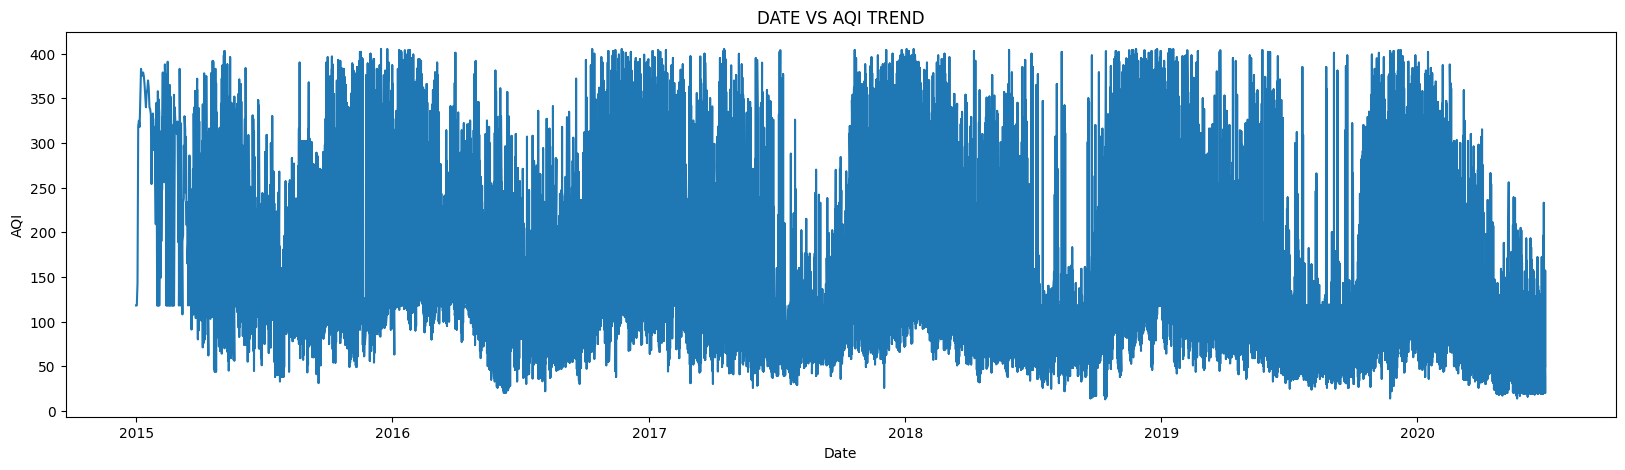

In [50]:
# 1. AQI Trend Over Time
plt.figure(figsize=(20,5))
plt.plot(df_1['date'], df_1['aqi'])
plt.title("DATE VS AQI TREND")
plt.xlabel("Date")
plt.ylabel("AQI")
plt.show()

# INSIGHT

1. High Variability and Severe Peaks: The air quality is extremely volatile, showing rapid and intense fluctuations. The plot is frequently dominated by severe pollution peaks, consistently reaching AQI levels near 400 every year.

2. Strong Seasonal Pattern: There is a clear annual cycle where the most intense and sustained periods of poor air quality occur in the latter part of the year (late autumn/winter).

3. Persistent Poor Baseline: Even outside of the major peak events, the AQI rarely stays in the 'Good' range (0-50), often fluctuating around the 100-200 level, indicating a persistent problem with moderate to poor air quality.

Top 10 Cities with more Reading Taken

In [51]:
top_10_count = df_1['city'].value_counts().head(10)
top_10_count

,count
city,
Delhi,1998
Bengaluru,1909
Lucknow,1891
Chennai,1878
Hyderabad,1877
Patna,1456
Gurugram,1448
Ahmedabad,1332
Visakhapatnam,1167


Top 4 Cities With High Polution(Based on AQI)

In [52]:
top_4_city = df_1.groupby('city')["aqi"].mean().sort_values(ascending=False).head(4).index

Each City Pollution Level As Per Day

In [53]:
pivot_table1 = df_1.pivot_table(
    index='day',
    columns='city',
    values='aqi',
    aggfunc='mean'
)

Top 4 City Pollution Level As Per Day

In [54]:
pivot_table1[top_4_city]

city,Delhi,Patna,Gurugram,Lucknow
day,,,,
1,208.328358,194.687500,196.705882,188.571429
2,218.772727,190.489796,193.531915,203.984127
3,215.333333,207.140000,185.063830,197.666667
4,226.939394,203.235294,207.565217,209.354839
5,233.000000,184.923077,209.531915,204.838710
6,228.651515,188.551020,195.782609,201.571429
7,215.560606,216.187500,199.000000,198.209677
8,208.606061,219.791667,218.000000,188.311475
9,222.242424,207.021739,209.604167,189.442623


Day-Wise Trend for Top 4 Highest Pollution City As per AVG AQI

In [55]:
df_top4 = df_1[df_1['city'].isin(top_4_city)]

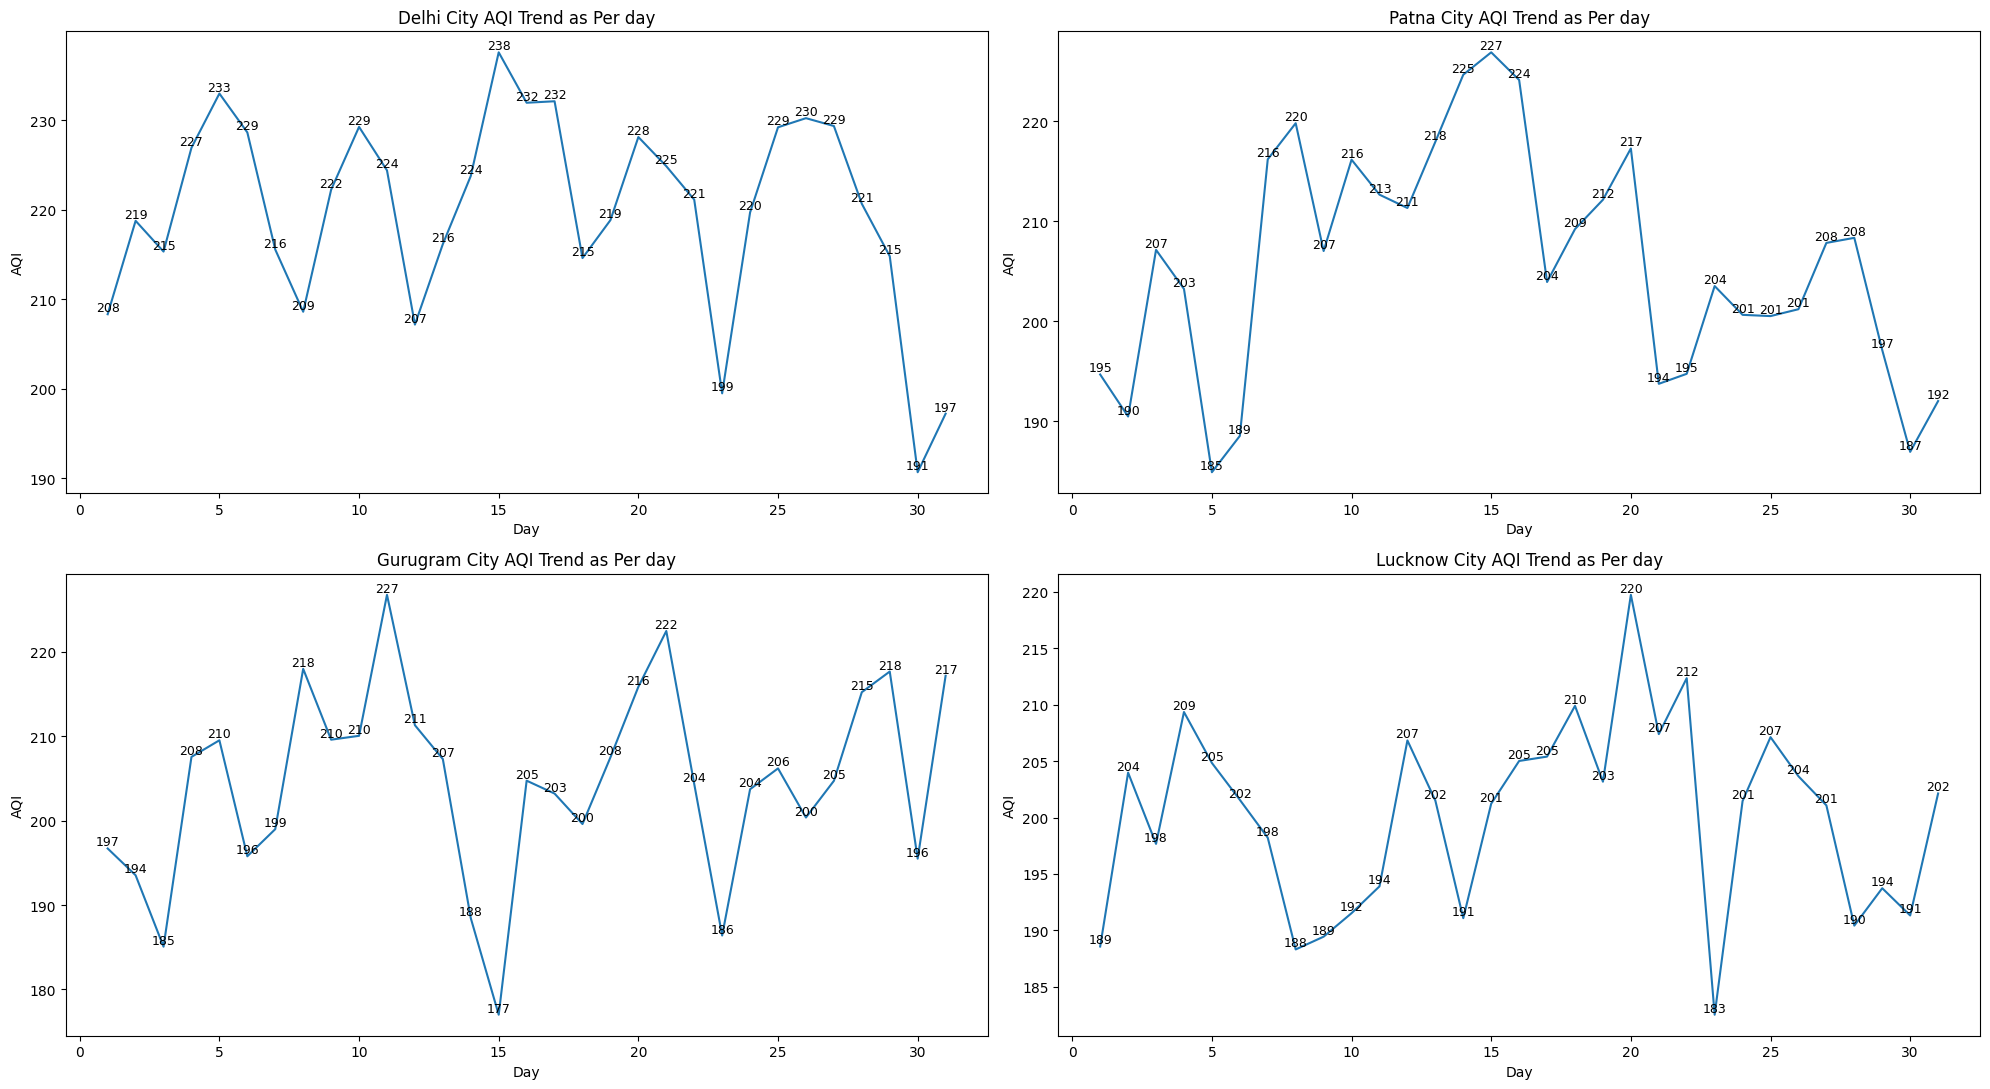

In [56]:
plt.figure(figsize=(20, 11))   # Big image

for i, city in enumerate(top_4_city, 1):
    city_data = df_1[df_1['city'] == city]
    trend = city_data.groupby('day')['aqi'].mean()

    plt.subplot(2,2, i)   # (rows, columns, position)
    plt.plot(trend.index, trend.values)
    plt.title(f"{city} City AQI Trend as Per day")
    plt.xlabel("Day")
    plt.ylabel("AQI")

    for x, y in zip(trend.index, trend.values):
        plt.text(
            x, y,
            f"{y:.0f}",        # round to 1 decimal
            fontsize=9,
            ha='center',
            va='bottom'
        )

plt.tight_layout()
plt.show()

# INSIGHT

1. Universally Poor Air Quality: All four cities (Delhi, Patna, Gurugram, Lucknow) consistently show a high average daily AQI, primarily fluctuating in the Poor (201–300) and sometimes Very Poor (301–400) range. There are virtually no days of "Good" or "Satisfactory" air quality.

2. Delhi & Patna Lead the Peaks: Delhi and Patna are the most polluted, frequently registering the highest daily AQI values, peaking around 233-234. This suggests their pollution sources or weather conditions are slightly more severe than Gurugram and Lucknow.

3. High Daily Volatility: The air quality is extremely unstable across the month for all cities, characterized by sharp day-to-day changes (peaks and troughs). This high volatility indicates a strong influence from daily weather changes (like wind speed) and/or transient local emission events (like traffic spikes or local burning).

Month-Wise Trend for Top 4 Highest Pollution City As per AVG AQI

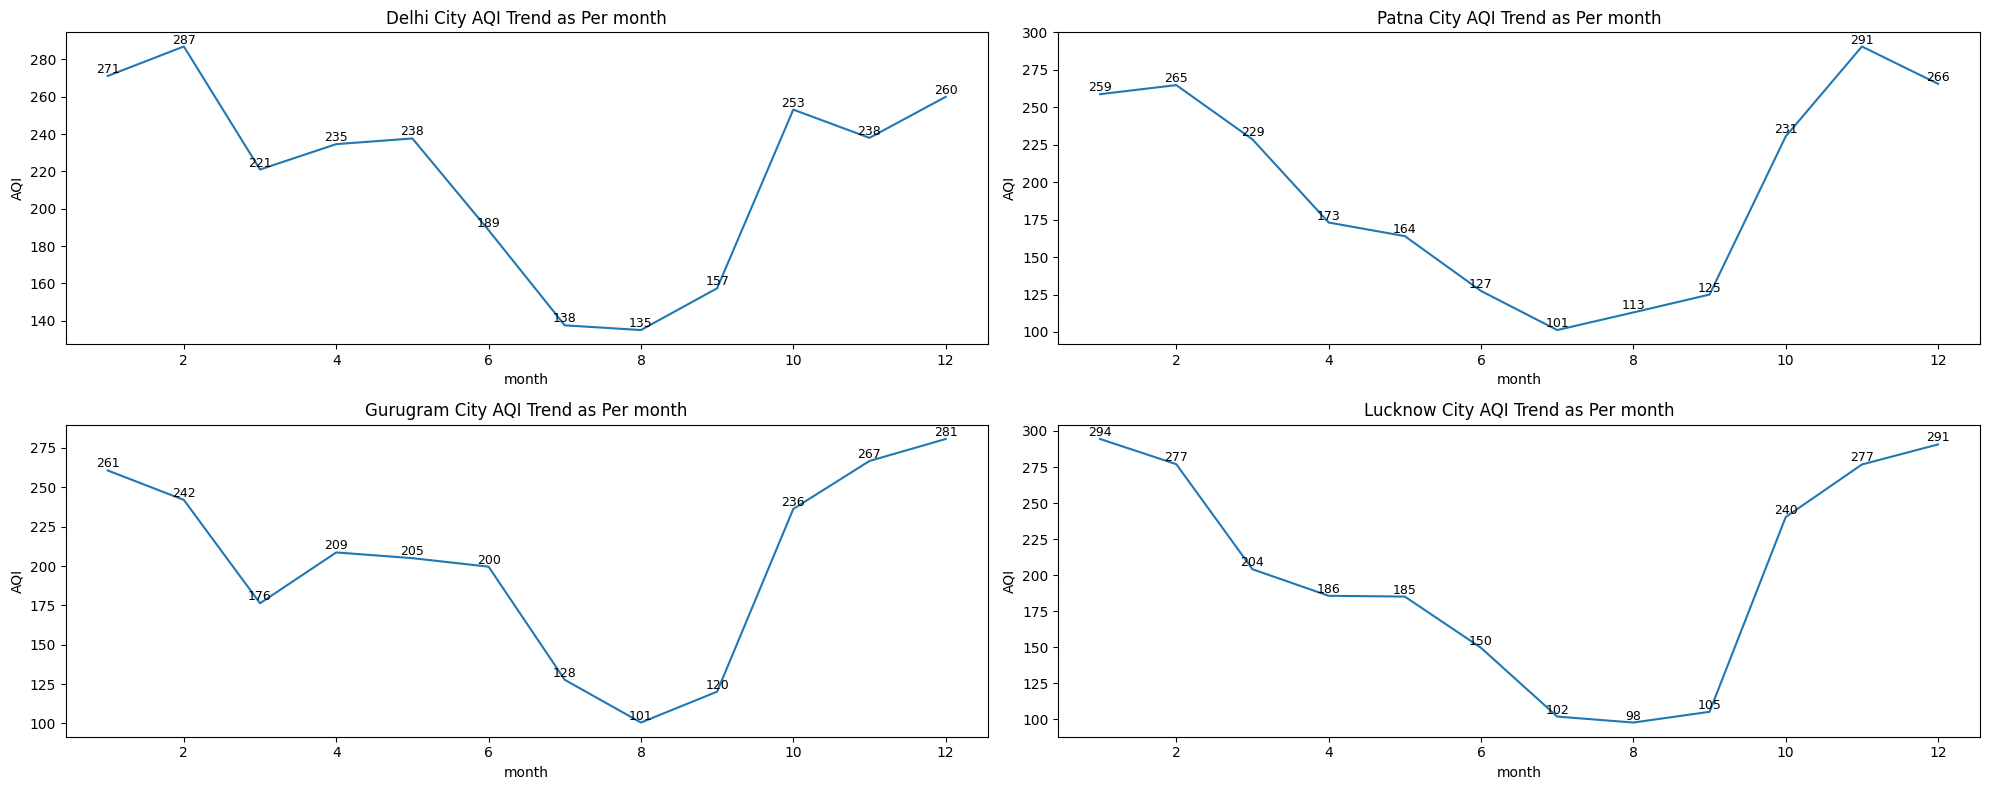

In [57]:
plt.figure(figsize=(20, 8))   # Big image

for i, city in enumerate(top_4_city, 1):
    city_data = df_1[df_1['city'] == city]
    trend = city_data.groupby('month')['aqi'].mean()

    plt.subplot(2,2, i)   # (rows, columns, position)
    plt.plot(trend.index, trend.values)
    plt.title(f"{city} City AQI Trend as Per month")
    plt.xlabel("month")
    plt.ylabel("AQI")

    for x, y in zip(trend.index, trend.values):
        plt.text(
            x, y,
            f"{y:.0f}",        # round to 1 decimal
            fontsize=9,
            ha='center',
            va='bottom'
        )

plt.tight_layout()
plt.show()

# INSIGHT

1. Extreme Winter Pollution Peaks: All four cities exhibit a severe and consistent seasonal pattern. The AQI is highest during the transition to and during winter months (Months 10, 11, and 12), peaking again in the early part of the year (Month 1 and 2). Peak AQI values range from 260 to 300 across the cities.

2. Cleanest in Monsoon/Summer: Conversely, air quality drastically improves during the summer and monsoon months (Months 6, 7, and 8). Patna and Lucknow show the most significant drops, with their AQI dipping to levels as low as 98-101 (Good to Satisfactory range), while Delhi and Gurugram stay slightly higher (around 130-140).

3. Highly Consistent Seasonal Shape: The shape of the monthly trend is remarkably similar for all four cities: a deep "U" or "V" pattern. This confirms that the factors driving seasonal pollution (stubble burning, low wind speed, low inversion layers) affect this entire region uniformly, regardless of local city differences.

 Year-Wise Trend for Top 4 Highest Pollution City As per AVG AQI

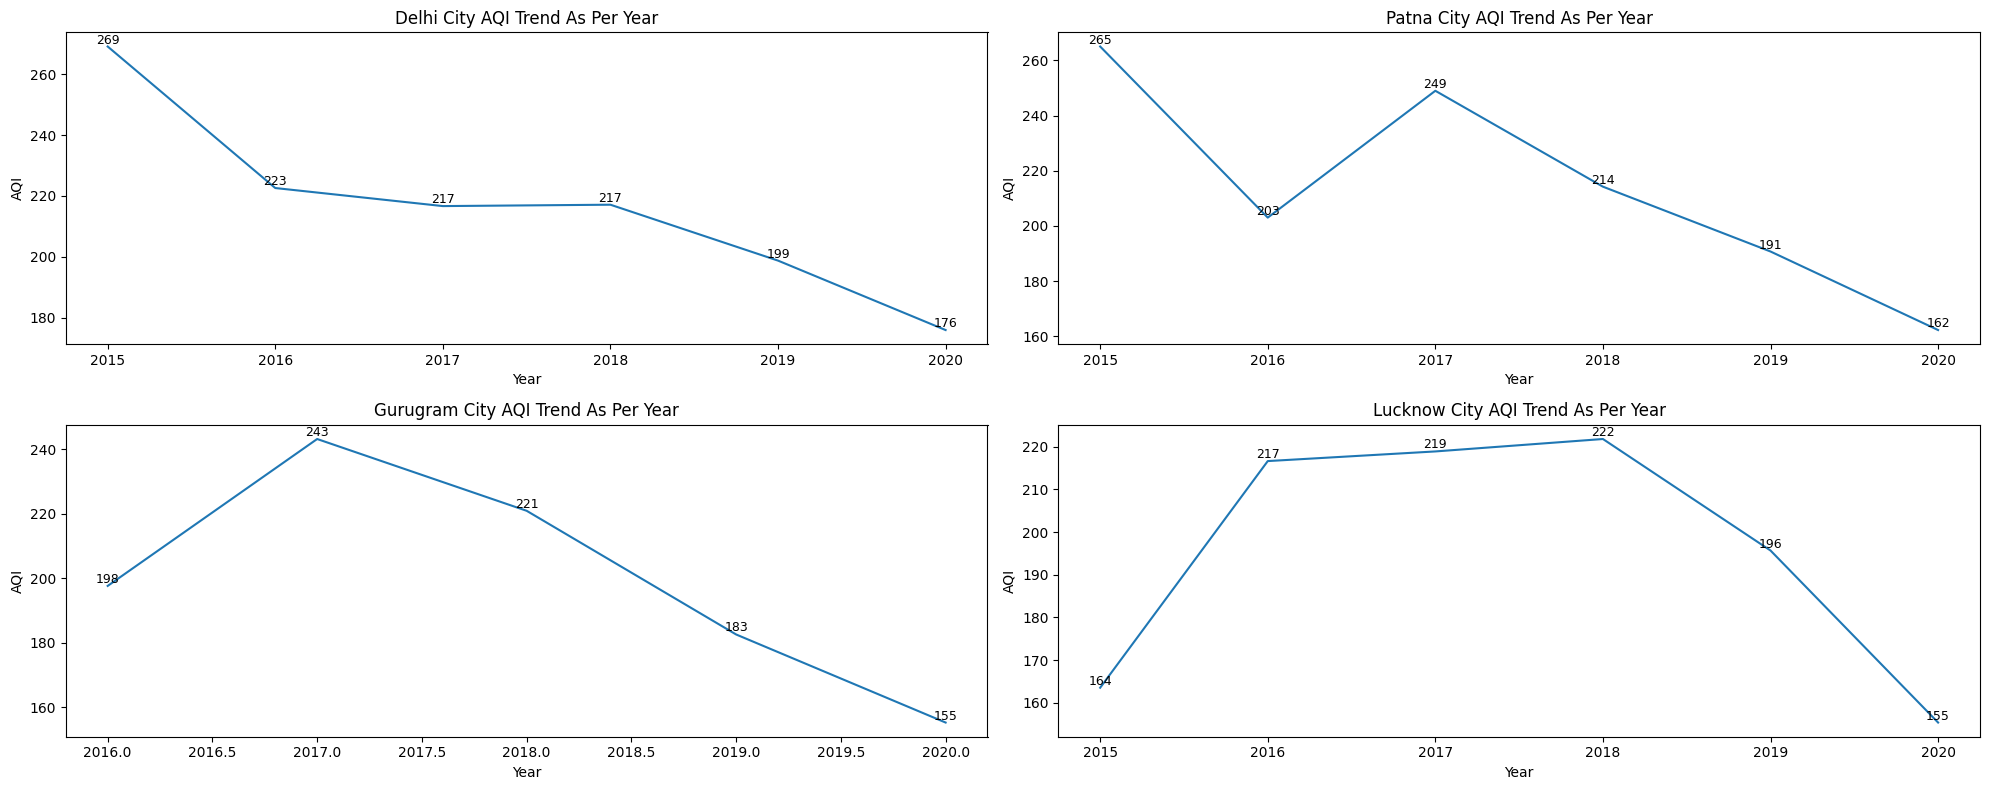

In [58]:
plt.figure(figsize=(20, 8))   # Big image

for i, city in enumerate(top_4_city, 1):
    city_data = df_1[df_1['city'] == city]
    trend = city_data.groupby('year')['aqi'].mean()

    plt.subplot(2,2, i)   # (rows, columns, position)
    plt.plot(trend.index, trend.values)
    plt.title(f"{city} City AQI Trend As Per Year")
    plt.xlabel("Year")
    plt.ylabel("AQI")

    for x, y in zip(trend.index, trend.values):
        plt.text(
            x, y,
            f"{y:.0f}",        # round to 1 decimal
            fontsize=9,
            ha='center',
            va='bottom'
        )

plt.tight_layout()
plt.show()

# INSIGHT

The four line plots show the Average Annual AQI for Delhi, Patna, Gurugram, and Lucknow from 2015/2016 to 2020.

Here are the key insights:

1. Consistent Improvement from 2017/2018 Peaks: After an initial peak or high point around 2017 (Patna, Gurugram, Lucknow) or a high start (Delhi in 2015), all four cities show a clear, measurable decreasing trend in their average annual AQI from 2018 to 2020.

2. Significant Reductions in 2020: The year 2020 stands out with the lowest recorded average AQI for all four cities in the displayed period (e.g., Delhi dropped to 176 from a peak of 269, and Gurugram dropped to 155). This suggests that efforts, likely combined with the impact of pandemic lockdowns, led to the best air quality year observed.

3. Patna and Delhi Show Most Volatility: While all show a final decrease, Patna and Delhi started with the highest annual averages (265-269 in 2015). Patna showed a major spike in 2017 (249), while Delhi's decline was more linear from its 2015 high, indicating different short-term drivers in those early years.

# PM2.5 vs AQI for Hight & Low Pollution Cities

In [59]:
last_4_city = df_1.groupby('city')["aqi"].mean().sort_values(ascending=False).tail(4).index

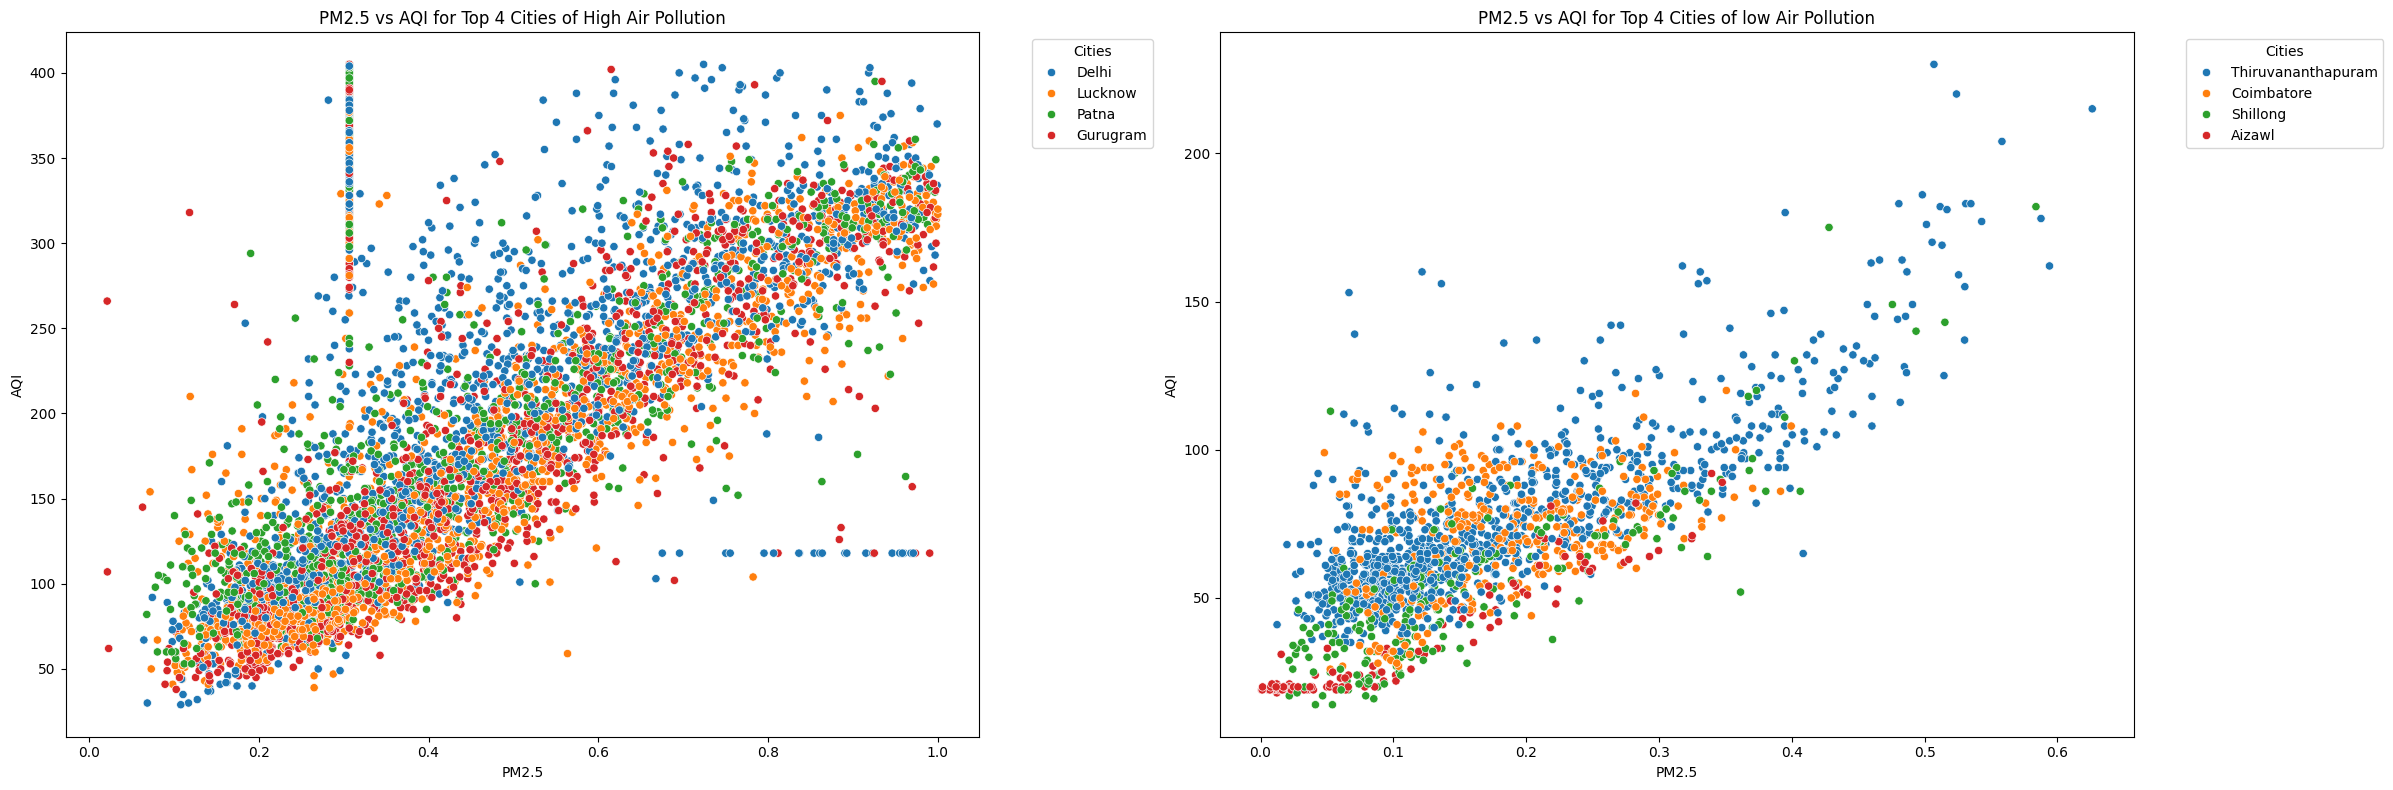

In [60]:
fig, axes = plt.subplots(1, 2, figsize=(24, 8))  # 1 row, 2 columns

# Plot for top 4 cities
sns.scatterplot(
    data=df_1[df_1['city'].isin(top_4_city)],
    x='pm2.5', y='aqi', hue='city', ax=axes[0]
)
axes[0].set_title('PM2.5 vs AQI for Top 4 Cities of High Air Pollution')
axes[0].set_xlabel('PM2.5')
axes[0].set_ylabel('AQI')
axes[0].legend(title='Cities', bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot for last 4 cities
sns.scatterplot(
    data=df_1[df_1['city'].isin(last_4_city)],
    x='pm2.5', y='aqi', hue='city', ax=axes[1]
)
axes[1].set_title('PM2.5 vs AQI for Top 4 Cities of low Air Pollution')
axes[1].set_xlabel('PM2.5')
axes[1].set_ylabel('AQI')
axes[1].legend(title='Cities', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()



Same Visual Using Plotly

In [61]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [62]:
# Create subplots
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=('PM2.5 vs AQI for Top 4 Cities of High Air Pollution',
                    'PM2.5 vs AQI for Top 4 Cities of Low Air Pollution')
)

# Add scatter for top 4 cities
for city in top_4_city:
    city_data = df_1[df_1['city'] == city]
    fig.add_trace(
        go.Scatter(
            x=city_data['pm2.5'],
            y=city_data['aqi'],
            mode='markers',
            name=city,
            marker=dict(size=8),
            legendgroup='top4'
        ),
        row=1, col=1
    )

# Add scatter for last 4 cities
for city in last_4_city:
    city_data = df_1[df_1['city'] == city]
    fig.add_trace(
        go.Scatter(
            x=city_data['pm2.5'],
            y=city_data['aqi'],
            mode='markers',
            name=city,
            marker=dict(size=8),
            legendgroup='last4',
            showlegend=True
        ),
        row=1, col=2
    )

# Update layout
fig.update_layout(
    width=1200,
    height=600,
    title_text='PM2.5 vs AQI Comparison For Top 4 High & low Pollution cities',
    xaxis_title='PM2.5',
    xaxis2_title='PM2.5',
    yaxis_title='AQI',
    yaxis2_title='AQI',
    legend_title_text='High Pollution Cities',
    legend=dict(
        x=1.05, y=1,   # Position for first legend (top right of first plot)
        tracegroupgap=200
    )
)

# If you want shared y-axis for both plots
fig.update_yaxes(title_text='AQI', row=1, col=1)
fig.update_yaxes(title_text='AQI', row=1, col=2)

fig.show()


#INSIGHT

This visual compares the correlation between $\text{PM2.5}$ and AQI for both sets of cities.

1. PM2.5 is the Primary Driver of High AQI: In high-pollution cities (Left Plot), there is a very strong positive correlation between $\text{PM2.5}$ concentration and the AQI, particularly when AQI is above 150. $\text{PM2.5}$ is clearly the pollutant pushing the AQI into the Poor (200+) and Very Poor (300+) categories.

2. Linear Correlation in Low Pollution Cities: In low-pollution cities (Right Plot), the correlation remains positive but is much less steep. Low levels of $\text{PM2.5}$ generally keep the AQI low (mostly under 100), with $\text{PM2.5}$ values rarely exceeding 0.4.

3. High Pollution City Data is Clustered: For high-pollution cities, the data is very dense and clustered at the higher ends of both axes, meaning the high $\text{PM2.5}$ levels are consistently present and drive the poor air quality for a large number of recorded days.

# O3 vs AQI for Hight & Low Pollution Cities

In [63]:
#Create subplots
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=('O3 vs AQI for Top 4 Cities of High Air Pollution',
                    'O3 vs AQI for Top 4 Cities of Low Air Pollution')
)

# Add scatter for top 4 cities
for city in top_4_city:
    city_data = df_1[df_1['city'] == city]
    fig.add_trace(
        go.Scatter(
            x=city_data['o3'],
            y=city_data['aqi'],
            mode='markers',
            name=city,
            marker=dict(size=8),
            legendgroup='top4'
        ),
        row=1, col=1
    )

# Add scatter for last 4 cities
for city in last_4_city:
    city_data = df_1[df_1['city'] == city]
    fig.add_trace(
        go.Scatter(
            x=city_data['o3'],
            y=city_data['aqi'],
            mode='markers',
            name=city,
            marker=dict(size=8),
            legendgroup='last4',
            showlegend=True
        ),
        row=1, col=2
    )

# Update layout
fig.update_layout(
    width=1200,
    height=600,
    title_text='O3 vs AQI Comparison For Top 4 High & low Pollution cities',
    xaxis_title='O3',
    xaxis2_title='O3',
    yaxis_title='AQI',
    yaxis2_title='AQI',
    legend_title_text='High Pollution Cities',
    legend=dict(
        x=1.05, y=1,   # Position for first legend (top right of first plot)
        tracegroupgap=200
    )
)

# If you want shared y-axis for both plots
fig.update_yaxes(title_text='AQI', row=1, col=1)
fig.update_yaxes(title_text='AQI', row=1, col=2)

fig.show()

# INSIGHT

**O3 vs AQI (Ozone)**
1. Weak Correlation at High AQI: In high-pollution cities, there is no clear positive trend between $\text{O3}$ concentration and high AQI (AQI > 250). The AQI reaches its highest levels regardless of $\text{O3}$ concentration, suggesting $\text{O3}$ is not the primary driver of the most severe pollution peaks.

2. Moderate Correlation in Low Pollution Cities: In low-pollution cities, a clearer positive correlation exists: as $\text{O3}$ increases, AQI tends to increase, but the AQI remains below 200, indicating $\text{O3}$ can influence air quality but does not lead to the extreme pollution seen elsewhere.

3. Wide Scatter for High Pollution Cities: The wide distribution of points across the high-pollution plot confirms that high AQI is caused by other factors; $\text{O3}$ levels are simply too dispersed to be the main cause.

# NO2 vs AQI for Hight & Low Pollution Cities

In [64]:
#Create subplots
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=('NO2 vs AQI for Top 4 Cities of High Air Pollution',
                    'NO2 vs AQI for Top 4 Cities of Low Air Pollution')
)

# Add scatter for top 4 cities
for city in top_4_city:
    city_data = df_1[df_1['city'] == city]
    fig.add_trace(
        go.Scatter(
            x=city_data['no2'],
            y=city_data['aqi'],
            mode='markers',
            name=city,
            marker=dict(size=8),
            legendgroup='top4'
        ),
        row=1, col=1
    )

# Add scatter for last 4 cities
for city in last_4_city:
    city_data = df_1[df_1['city'] == city]
    fig.add_trace(
        go.Scatter(
            x=city_data['no2'],
            y=city_data['aqi'],
            mode='markers',
            name=city,
            marker=dict(size=8),
            legendgroup='last4',
            showlegend=True
        ),
        row=1, col=2
    )

# Update layout
fig.update_layout(
    width=1200,
    height=600,
    title_text='NO2 vs AQI Comparison For Top 4 High & low Pollution cities',
    xaxis_title='NO2',
    xaxis2_title='NO2',
    yaxis_title='AQI',
    yaxis2_title='AQI',
    legend_title_text='High Pollution Cities',
    legend=dict(
        x=1.05, y=1,   # Position for first legend (top right of first plot)
        tracegroupgap=200
    )
)

# If you want shared y-axis for both plots
fig.update_yaxes(title_text='AQI', row=1, col=1)
fig.update_yaxes(title_text='AQI', row=1, col=2)

fig.show()

# INSIGHT

**NO2 vs AQI (Nitrogen Dioxide)**

1. NO2 Not the Primary AQI Driver: Similar to $\text{O3}$, there is a weak to non-existent correlation between $\text{NO2}$ and AQI in the high-pollution cities, especially when AQI is above 200. This strongly suggests that vehicular emissions ($\text{NO2}$’s major source) are not the dominant factor in determining the overall severe AQI.

2. Low Levels in Low Pollution Cities: In low-pollution cities, $\text{NO2}$ levels are generally very low (mostly below 0.2), contributing to the good air quality, though a slight positive trend is visible.

3. Other Pollutants Dominate: The vast number of high AQI days (150-400) occurring across the entire range of $\text{NO2}$ values reinforces that the overall high AQI is being set by other pollutants (like $\text{PM2.5}$).

# SO2 VS AQI for Hight & Low Pollution Cities

In [65]:
#Create subplots
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=('SO2 vs AQI for Top 4 Cities of High Air Pollution',
                    'SO2 vs AQI for Top 4 Cities of Low Air Pollution')
)

# Add scatter for top 4 cities
for city in top_4_city:
    city_data = df_1[df_1['city'] == city]
    fig.add_trace(
        go.Scatter(
            x=city_data['so2'],
            y=city_data['aqi'],
            mode='markers',
            name=city,
            marker=dict(size=8),
            legendgroup='top4'
        ),
        row=1, col=1
    )

# Add scatter for last 4 cities
for city in last_4_city:
    city_data = df_1[df_1['city'] == city]
    fig.add_trace(
        go.Scatter(
            x=city_data['so2'],
            y=city_data['aqi'],
            mode='markers',
            name=city,
            marker=dict(size=8),
            legendgroup='last4',
            showlegend=True
        ),
        row=1, col=2
    )

# Update layout
fig.update_layout(
    width=1200,
    height=600,
    title_text='S02 vs AQI Comparison For Top 4 High & low Pollution cities',
    xaxis_title='S02',
    xaxis2_title='SO2',
    yaxis_title='AQI',
    yaxis2_title='AQI',
    legend_title_text='High Pollution Cities',
    legend=dict(
        x=1.05, y=1,   # Position for first legend (top right of first plot)
        tracegroupgap=200
    )
)

# If you want shared y-axis for both plots
fig.update_yaxes(title_text='AQI', row=1, col=1)
fig.update_yaxes(title_text='AQI', row=1, col=2)

fig.show()

# INSIGHT

**SO2 vs AQI (Sulphur Dioxide)**

1. SO2 has the Weakest Correlation to High AQI: Across the high-pollution cities, $\text{SO2}$ shows the most scattered and least correlative pattern with AQI. High AQI (300-400) occurs even when $\text{SO2}$ is near zero, meaning $\text{SO2}$ is not the component causing the most hazardous air days.

2. Very Low SO2 in Low Pollution Cities: In low-pollution cities, $\text{SO2}$ levels are negligible, confirming a lack of heavy industrial sources that typically emit this gas.

3. Implies Industrial Source Control: The lack of correlation suggests that whatever industrial or power generation sources of $\text{SO2}$ may exist, they are either well-controlled or do not contribute enough to the overall pollutant mix to be the dominant factor in setting the AQI.

# City Wise Average AQI

In [66]:
import plotly.express as px

city_avg = df_1.groupby('city')['aqi'].mean().reset_index()

fig = px.bar(
    city_avg.sort_values('aqi'),
    x='city',
    y='aqi',
    text='aqi'     # <-- Adds data labels
)

# Format labels
fig.update_traces(texttemplate='%{text:.1f}', textposition='inside')

# Improve layout
fig.update_layout(
    xaxis_title="City",
    yaxis_title="Average AQI",
    height=600)
fig.update_layout(title_text='City-wise Average AQI',width=1200,height=600)

fig.show()


# INSIGHT

This chart ranks cities by their overall average AQI, clearly separating high and low pollution areas.

1. Extreme Pollution Disparity: There is a massive difference in average air quality between the best and worst cities. Delhi leads with the highest average AQI of 220.4, followed by Patna and Gurugram, while Aizawl has the lowest at a very healthy 34.8.

2. North Indian Dominance in Pollution: The cities with the highest average AQI (above 200) are all from the Northern/Eastern plain (Delhi, Patna, Gurugram, Lucknow). Conversely, the cities with the best air quality (under 100) are often coastal or Northeast (Aizawl, Shillong, Coimbatore).

3. Most Cities are in the Poor Range: The majority of the listed cities, including major metros like Mumbai, Hyderabad, and Chennai, fall into the Moderate or Poor range, with averages well above 100, indicating a widespread air quality challenge across India.

# Weekend VS Weekdat PM 2.5 Level Box Chart

In [67]:
import plotly.express as px

fig = px.box(
    df_1,
    x="is_weekend",
    y="aqi",
    title="Weekend vs Weekday PM 2.5 Level",
    color="is_weekend"      # Adds different colors for weekend/weekday
)

fig.update_layout(
    yaxis_title="PM 2.5",
    height=400,
    width = 800
)

fig.show()

# INSIGHT

This box plot compares $\text{PM2.5}$ levels, a key pollutant, on weekdays ("false" for is_weekend) versus weekends ("true").

1. Similar Median PM2.5 Levels: The median $\text{PM2.5}$ level (the line inside the box) is almost identical for both weekdays (118) and weekends. This suggests that, on average, the background pollution level does not significantly change between the working week and the weekend.

2. Slightly Higher Weekend Extremes: The maximum $\text{PM2.5}$ reading is higher on weekends (max: 405) compared to weekdays (max: 400). The overall box and whisker structure is very similar, indicating that pollution events occur with comparable severity regardless of the day type.

3. Low Impact of Weekend Activity on PM2.5: Since the IQR (Interquartile Range, the box itself) and the median are nearly the same, factors linked to weekly cycles (like office commute traffic) are not the dominant driver of $\text{PM2.5}$ pollution; consistent, underlying sources (industrial, residential, seasonal) must be the primary contributors.

# High Pollution City(Delhi) AQI Distribution

In [68]:
df1_delhi = df_1[df_1["city"] == "Delhi"]

dlh_counts = df1_delhi.groupby(["aqi_bucket_lvl","aqi_bucket"])["aqi"].size().reset_index(name = "counts")

# Sort by aqi_bucket_lvl ascending
dlh_counts_sorted = dlh_counts.reset_index().sort_values('aqi_bucket_lvl', ascending=True)
dlh_counts_sorted.rename(columns={'aqi':'counts'}, inplace=True)

# Create pie chart
fig = px.pie(
    dlh_counts_sorted,
    names='aqi_bucket',
    values='counts',
    title='Delhi AQI Distribution',
    color='aqi_bucket',  # optional: color by category
    color_discrete_sequence=px.colors.qualitative.Pastel
)

# Show count and percent on the chart
fig.update_traces(textinfo='label+value+percent')

fig.update_layout(
    legend_title_text='AQI Category',
    width=700,
    height=600
)

fig.show()

# INSIGHT

1. Dominated by Unhealthy Categories: Over 95% of recorded days in Delhi fall into the Moderate, Poor, Very Poor, or Severe AQI categories (Moderate 37.2% + Poor 27.1% + Very Poor 26% = $\approx 90.3\%$).

2. Near Zero Good Days: The percentage of days with Good (1%) or Satisfactory (1.3%) air quality is negligible, confirming that severe pollution is the norm, not the exception, in Delhi.

3. High Frequency of Severe Events: The presence of a significant proportion of Severe (0.751%) and Very Poor (26%) days highlights the city's recurrent exposure to hazardous air quality.

# Low Pollution City(Delhi) AQI Distribution

In [69]:
df1_aizawl = df_1[df_1["city"] == "Aizawl"]

aiz_counts = df1_aizawl.groupby(["aqi_bucket_lvl","aqi_bucket"])["aqi"].size().reset_index(name = "counts")

# Sort by aqi_bucket_lvl ascending
aiz_counts_sorted = aiz_counts.reset_index().sort_values('aqi_bucket_lvl', ascending=True)
aiz_counts_sorted.rename(columns={'aqi':'counts'}, inplace=True)

# Create pie chart
fig = px.pie(
    aiz_counts_sorted,
    names='aqi_bucket',
    values='counts',
    title='Aizawl AQI Distribution',
    color='aqi_bucket',  # optional: color by category
    color_discrete_sequence=px.colors.qualitative.Pastel
)

# Show count and percent on the chart
fig.update_traces(textinfo='label+value+percent')

fig.update_layout(
    legend_title_text='AQI Category',
    width=500,
    height=400
)

fig.show()

# INSIGHT

1. Exclusively Healthy Air Quality: The city of Aizawl records 100% of its days in the Good (74.8%) or Satisfactory (25.2%) categories.

2. No Unhealthy Days Recorded: There are zero recorded days in the Moderate, Poor, Very Poor, or Severe categories, representing the cleanest air quality profile across the dataset.

3. Best Case Scenario: Aizawl serves as a vital benchmark, demonstrating the air quality profile achievable when pollution sources (specifically $\text{PM2.5}$) are negligible.